<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Возможно, чтобы во всех домашках для генерации рандомных значенией использовался один сид, наверное это как-то упрощает проверку. По умолчанию сид равен текщему времени, то есть при каждом запуке он разный.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла) (done)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла) (done)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла) (done)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла) (done)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла) (done)

In [5]:
df_train.sample(n=10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [6]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [7]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

### Пропуски:

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
def convert_val(value):
    if pd.isna(value):
        return pd.NA
    
    try:
        return float(value.split()[0])
    except ValueError:
        return pd.NA

def convert_column(df: pd.DataFrame, column: str, new_column: str):
    df[new_column] = df[column].apply(convert_val)
    df.drop(column, axis=1, inplace=True)
    return df

def replace_nan_with_median(train: pd.DataFrame, test: pd.DataFrame, column: str):
    median_val = train[column].median()
    train[column] = train[column].fillna(median_val)
    test[column] = test[column].fillna(median_val)
    return train, test

def conver_train_test_column(train: pd.DataFrame, test: pd.DataFrame, column: str, new_column: str):
    train = convert_column(train, column, new_column)
    test = convert_column(test, column, new_column)

    return replace_nan_with_median(train, test, new_column)

In [11]:
df_train, df_test = conver_train_test_column(df_train, df_test, 'mileage', 'mileage_kmpl')

/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[column] = train[column].fillna(median_val)
/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[column] = test[column].fillna(median_val)


The technical full form of cc is cubic. centimetres
Сделаем тоже самое для engine

In [12]:
df_train, df_test = conver_train_test_column(df_train, df_test, 'engine', 'engine_cc')

/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[column] = train[column].fillna(median_val)
/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[column] = test[column].fillna(median_val)


In [13]:
df_train, df_test = conver_train_test_column(df_train, df_test, 'max_power', 'max_power_bhp')

/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[column] = train[column].fillna(median_val)
/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_19112/622159832.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[column] = test[column].fillna(median_val)


In [14]:
df_train, df_test = replace_nan_with_median(df_train, df_test, 'seats')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   torque         6796 non-null   object 
 9   seats          6999 non-null   float64
 10  mileage_kmpl   6999 non-null   float64
 11  engine_cc      6999 non-null   float64
 12  max_power_bhp  6999 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 711.0+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   torque         981 non-null    object 
 9   seats          1000 non-null   float64
 10  mileage_kmpl   1000 non-null   float64
 11  engine_cc      1000 non-null   float64
 12  max_power_bhp  1000 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 101.7+ KB


Пропуски заполнили. Столбец torque дропнем дальше

In [17]:
df_train.duplicated().any()

True

In [54]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [14]:
from ydata_profiling import ProfileReport

In [21]:
profile_report = ProfileReport(df_train, title='Pandas Profiling Report')

In [22]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла) (done)
- [ ] Отобразите такие объекты (0.15 балла) (done)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла) (done)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла) (done)


In [18]:
df_train.shape

(6999, 13)

In [19]:
columns_to_check = [col for col in df_train.columns if col != 'selling_price']

duplicates = df_train.duplicated(subset=columns_to_check, keep='first')
print(f'Duplicated columns count: {duplicates.sum()}')

Duplicated columns count: 1159


In [20]:
df_train[duplicates].head()

name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
268                    Maruti Swift Dzire VXI  2014         400000      70000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
325                             Lexus ES 300h  2019        5150000      20000   

       fuel seller_type transmission         owner               torque  \
254  Petrol  Individual       Manual   First Owner       114Nm@ 4000rpm   
258  Petrol  Individual       Manual  Second Owner       114Nm@ 4000rpm   
268  Petrol  Individual       Manual  Second Owner       114Nm@ 4000rpm   
324  Diesel      Dealer    Automatic   First Owner  430Nm@ 1750-2500rpm   
325  Petrol      Dealer    Automatic   First Owner  202Nm@ 3600-5200rpm   

     seats  mileage_kmpl  engine_cc  max_power_bhp  
254    5.0         18.90     1197.0          82.00  
258    5.0         18.60     1197.0          85.80  
268    5.0         19.10     1197.0          85.80  
324    5.0         13.60     1999.0         177.00  
325    5.0         22.37     2487.0         214.56

In [21]:
df_train = df_train.drop_duplicates(subset=columns_to_check, keep='first')

In [22]:
assert df_train.shape == (5840, 13)

In [23]:
df_train = df_train.reset_index(drop=True)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``. (done)
* [ ] Приведите тип данных к ``float``. (done)
* [ ] Удалите столбец ``torque`` (done) 


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Уберите единицы измерения для признаков - Реализовано в рамках задания 1.

In [24]:
df_test.drop('torque', axis=1, inplace=True)
df_train.drop('torque', axis=1, inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу. (done)

In [25]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  seats  mileage_kmpl  engine_cc  \
0  Individual       Manual   First Owner    5.0         23.40     1248.0   
1  Individual       Manual  Second Owner    5.0         21.14     1498.0   
2  Individual       Manual   First Owner    5.0         23.00     1396.0   
3  Individual       Manual   First Owner    5.0         16.10     1298.0   
4  Individual       Manual   First Owner    5.0         20.14     1197.0   

   max_power_bhp  
0          74.00  
1         103.52  
2          90.00  
3          88.20  
4          81.86

In [26]:
df_train['engine_cc'] = df_train['engine_cc'].astype(int)
df_test['engine_cc'] = df_test['engine_cc'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [27]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  seats  mileage_kmpl  engine_cc  \
0  Individual       Manual   First Owner      5         23.40       1248   
1  Individual       Manual  Second Owner      5         21.14       1498   
2  Individual       Manual   First Owner      5         23.00       1396   
3  Individual       Manual   First Owner      5         16.10       1298   
4  Individual       Manual   First Owner      5         20.14       1197   

   max_power_bhp  
0          74.00  
1         103.52  
2          90.00  
3          88.20  
4          81.86

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [28]:
df_train.describe()

year  selling_price     km_driven        seats  mileage_kmpl  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000   5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04     5.426712     19.428611   
std       4.095622   5.354320e+05  6.007114e+04     0.982344      3.986026   
min    1983.000000   2.999900e+04  1.000000e+00     2.000000      0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04     5.000000     16.950000   
50%    2014.000000   4.050000e+05  7.000000e+04     5.000000     19.300000   
75%    2017.000000   6.400000e+05  1.000000e+05     5.000000     22.300000   
max    2020.000000   1.000000e+07  2.360457e+06    14.000000     42.000000   

         engine_cc  max_power_bhp  
count  5840.000000    5840.000000  
mean   1429.448973      87.910782  
std     485.662834      31.639585  
min     624.000000       0.000000  
25%    1197.000000      68.000000  
50%    1248.000000      81.860000  
75%    1498.000000      99.000000  
max    3604.000000     400.000000

In [29]:
df_test.describe()

year  selling_price      km_driven        seats  mileage_kmpl  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000   1000.000000   
mean   2013.681000   6.179010e+05   71393.341000     5.403000     19.337480   
std       4.012149   7.585539e+05   48486.218662     0.912921      3.951751   
min    1995.000000   3.100000e+04    1303.000000     4.000000      0.000000   
25%    2011.000000   2.500000e+05   37000.000000     5.000000     16.550000   
50%    2014.000000   4.349990e+05   61500.000000     5.000000     19.300000   
75%    2017.000000   6.700000e+05  100000.000000     5.000000     22.300000   
max    2020.000000   6.000000e+06  375000.000000     9.000000     32.260000   

        engine_cc  max_power_bhp  
count  1000.00000    1000.000000  
mean   1454.87600      90.844330  
std     521.99574      34.892709  
min     624.00000      34.200000  
25%    1197.00000      69.000000  
50%    1248.00000      82.425000  
75%    1582.00000     102.000000  
max    3604.00000     280.000000

In [30]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

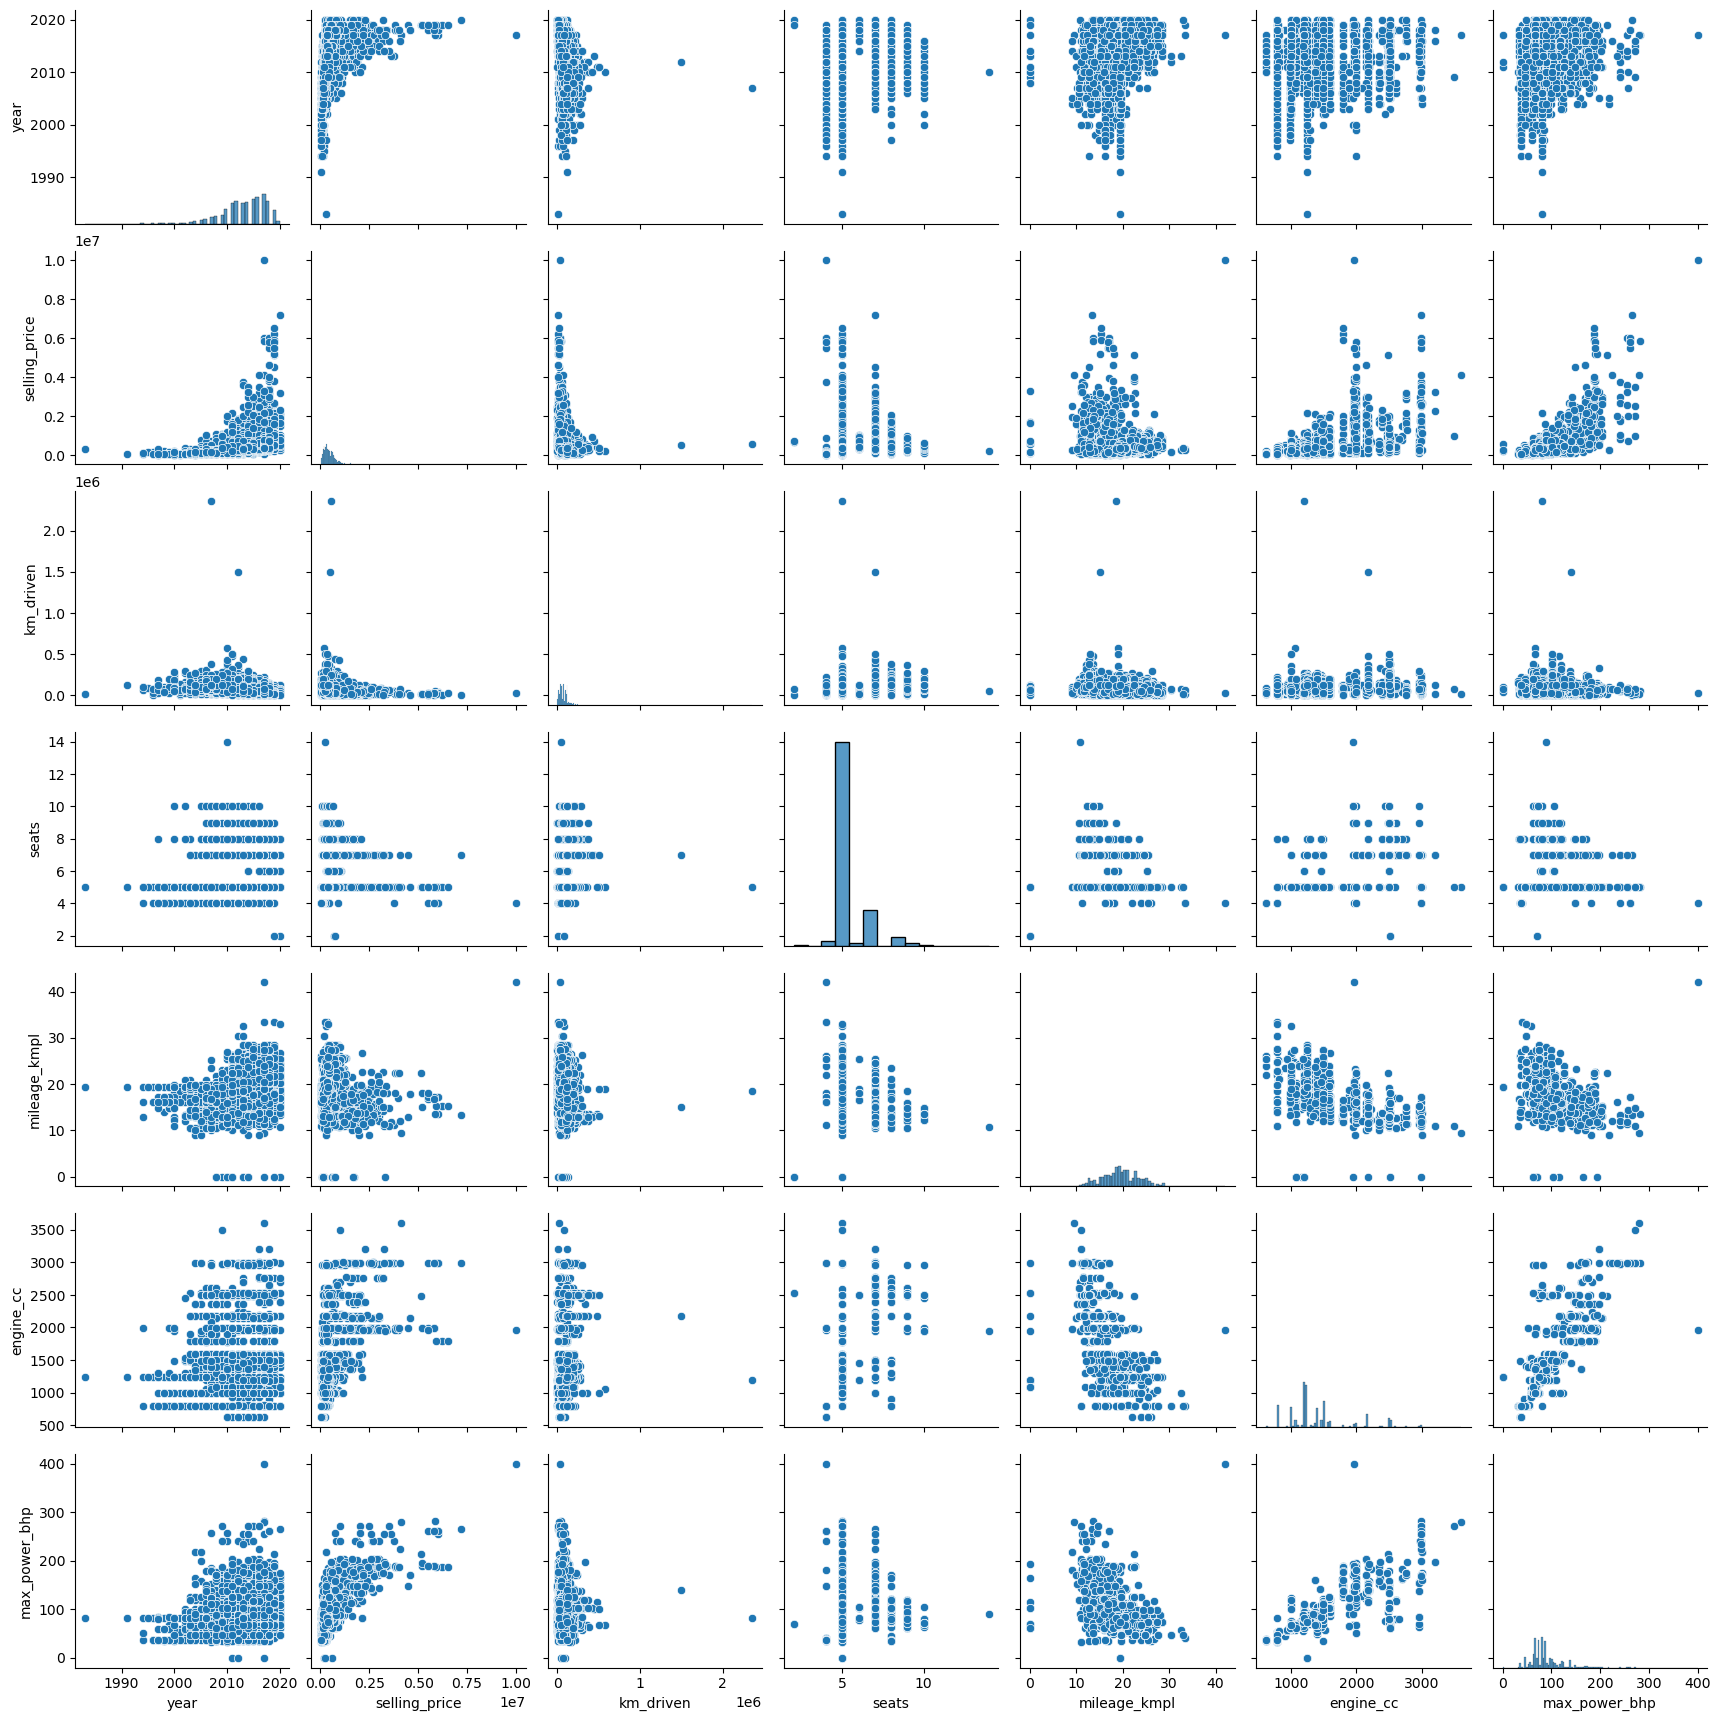

In [31]:
sns.pairplot(df_train)
plt.show()

По граффикамм видно, что:
- цена побльше, если у машины меньше пробег (km_driven)
- Высокие цены у новых машин
- цена растет с ростом max_power, но не всегда
- engine связан с max_power_bhp

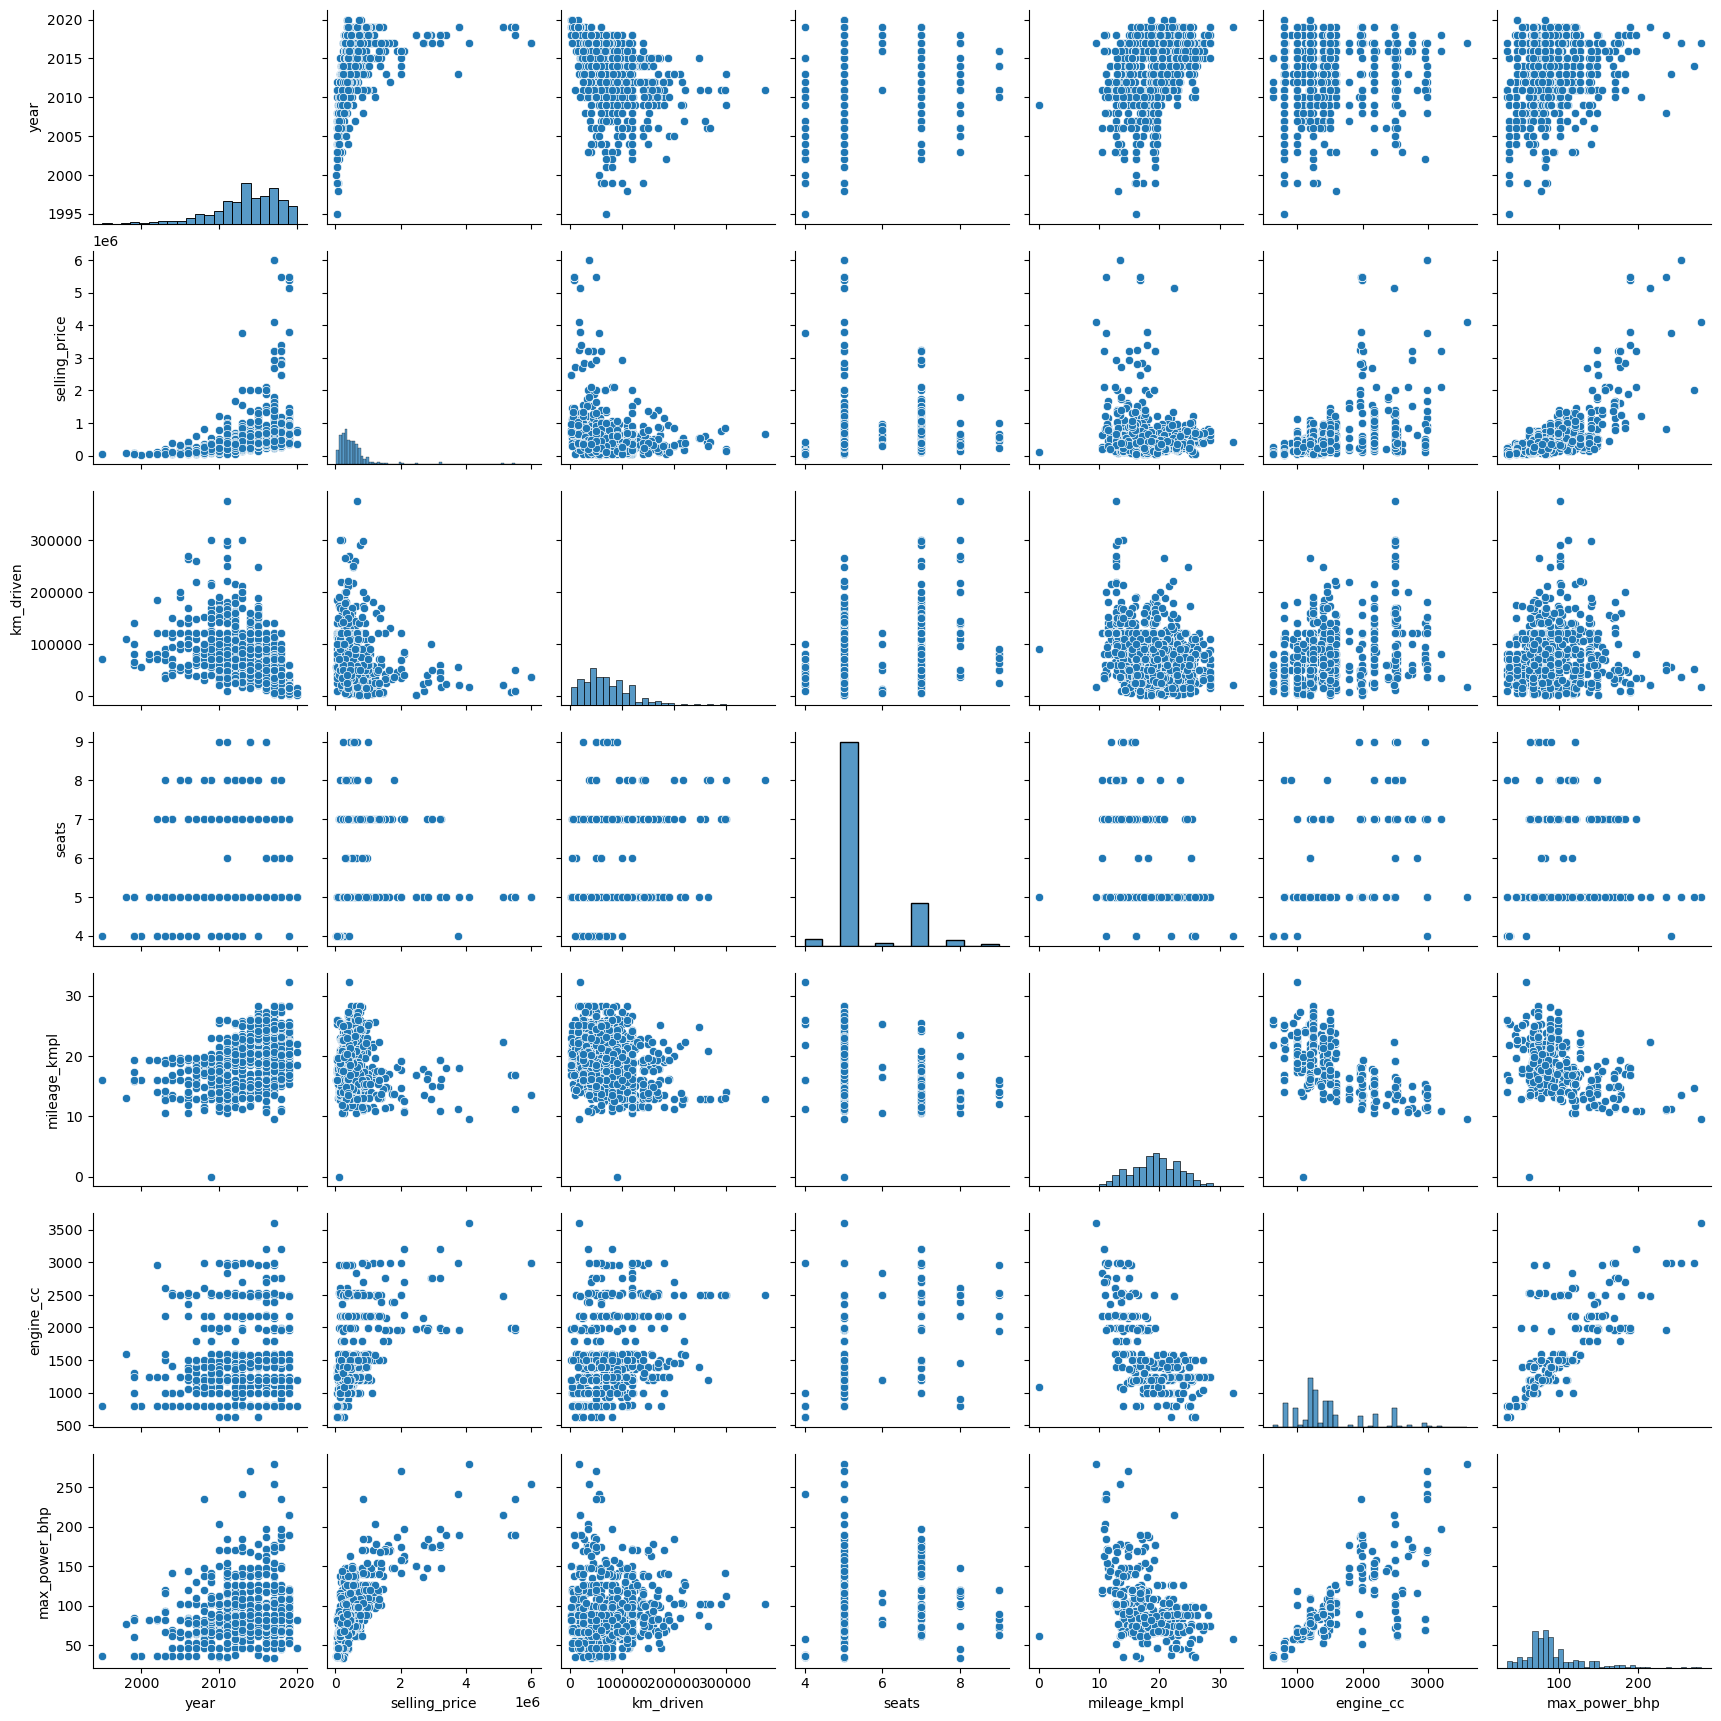

In [32]:
sns.pairplot(df_test)
plt.show()

Совокупности train и test похожи, присутствуют незначительные различия

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

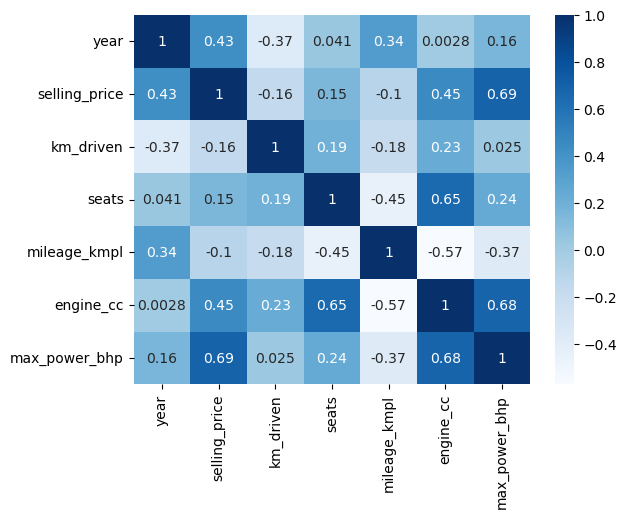

In [33]:
train_corr = df_train.corr(numeric_only=True)
sns.heatmap(train_corr, cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

По рисунку видно:
- год и engine_cc меньше всего скореллированы между собой
- Наиболее высокая корреляция наблюдаетс между selling_price и max_power_bhp, year и selling_price, seats и  engine_cc, mileage_kmpl и engine_cc.
- Присутствует корреляция между годом и пробегом со знаком минус, соответственно, чем меньше год, тем больше пробег, то есть в целом можно утверждать.


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [34]:
def get_X_y_data(df: pd.DataFrame):
    y_df = df['selling_price']
    X_df = df.select_dtypes(include='number')
    X_df.drop('selling_price', axis=1, inplace=True)
    return X_df, y_df

In [35]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  seats  mileage_kmpl  engine_cc  \
0  Individual       Manual   First Owner      5         23.40       1248   
1  Individual       Manual  Second Owner      5         21.14       1498   
2  Individual       Manual   First Owner      5         23.00       1396   
3  Individual       Manual   First Owner      5         16.10       1298   
4  Individual       Manual   First Owner      5         20.14       1197   

   max_power_bhp  
0          74.00  
1         103.52  
2          90.00  
3          88.20  
4          81.86

In [36]:
X_train, y_train = get_X_y_data(df_train)

In [37]:
X_train.head()

year  km_driven  seats  mileage_kmpl  engine_cc  max_power_bhp
0  2014     145500      5         23.40       1248          74.00
1  2014     120000      5         21.14       1498         103.52
2  2010     127000      5         23.00       1396          90.00
3  2007     120000      5         16.10       1298          88.20
4  2017      45000      5         20.14       1197          81.86

In [38]:
assert X_train.shape == (5840, 6)

In [39]:
X_test, y_test = get_X_y_data(df_test)

In [40]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
def output_model_results(m, y_true, X_data):
    pred = m.predict(X_data)

    print(f'''Metrics:
    mse={MSE(y_true, pred)}
    R2={r2_score(y_true, pred)}
    ''')

In [44]:
output_model_results(model, y_train, X_train)

Metrics:
    mse=116873067751.52124
    R2=0.5922629595849889
    


In [45]:
output_model_results(model, y_test, X_test)

Metrics:
    mse=233297548204.61246
    R2=0.5941441219017103
    


Выводы, значение метрик очень большое, значит, что качество модели прям плохое

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
output_model_results(model, y_train, X_train)

Metrics:
    mse=116873067751.52162
    R2=0.5922629595849875
    


In [49]:
output_model_results(model, y_test, X_test)

Metrics:
    mse=233297548204.60324
    R2=0.5941441219017263
    


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [50]:
weights = model.coef_
print("Weights:", weights)

Weights: [152843.26235772 -44148.04751104 -23220.5702262   28781.08659475
  61176.85714999 322779.70323584]


Наиболее инфоративным в предсказании цены является max_power_bhp

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [51]:
from sklearn.linear_model import Lasso
    
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [52]:
output_model_results(lasso, y_train, X_train)

Metrics:
    mse=116873067761.1426
    R2=0.5922629595514226
    


In [53]:
output_model_results(lasso, y_test, X_test)

Metrics:
    mse=233298215292.27713
    R2=0.594142961403231
    


In [56]:
weights = lasso.coef_
print("Weights:", weights)

Weights: [152843.01726724 -44146.95200806 -23217.74364543  28779.31599711
  61172.18427873 322780.54648733]


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': np.logspace(-4, 0, 50)}
gs = GridSearchCV(lasso, params, cv=10)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3...
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])})

In [ ]:
gs.fit(X_train, y_train)

In [65]:
output_model_results(gs, y_train, X_train)

Metrics:
    mse=116873067761.1426
    R2=0.5922629595514226
    


In [64]:
output_model_results(gs, y_test, X_test)

Metrics:
    mse=233298215292.27713
    R2=0.594142961403231
    


In [66]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(-0.5681539559351728, Lasso(), {'alpha': 1.0})

In [68]:
best_model = gs.best_estimator_

In [69]:
weights = best_model.coef_
print("Weights:", weights)

Weights: [152843.01726724 -44146.95200806 -23217.74364543  28779.31599711
  61172.18427873 322780.54648733]


In [ ]:
len(params['alpha'])

50

Следовательно 10 * 50 = 500 моделей будет тренировать  Grid search
Лучший коэффициент = 1

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-4, 0, 50),
    'l1_ratio': np.linspace(0, 1, 30)
}

en = ElasticNet()
grid_search = GridSearchCV(en, param_grid, cv=10)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# your code here

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    # your code here

business_metric(# your code here)

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

